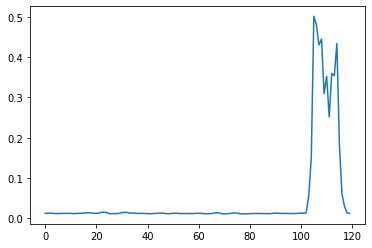

In [2]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

sys.path.append('../')
import lib.metrics
from tsdr import tsdr

# retrieved metrics
filepath = '/tmp/sockshop/metrics-b2qdj-retrievd_20210904/2021-08-18-argowf-chaos-b2qdj-user_pod-memory-hog_3.json'
data_df, _, metrics_meta = tsdr.read_metrics_json(filepath)
chaos_type = metrics_meta['injected_chaos_type']
chaos_comp = metrics_meta['chaos_injected_component']
series = data_df['s-front-end_latency'].to_numpy()
plt.plot(series)


In [3]:
series

array([0.0123, 0.0127, 0.013 , 0.0125, 0.0117, 0.0119, 0.0119, 0.0122,
       0.0122, 0.0123, 0.0121, 0.0117, 0.0119, 0.0123, 0.0126, 0.0128,
       0.0137, 0.0137, 0.0132, 0.0124, 0.0124, 0.0125, 0.015 , 0.0149,
       0.0145, 0.0115, 0.0115, 0.0117, 0.0118, 0.0124, 0.0142, 0.0148,
       0.0145, 0.013 , 0.0129, 0.0125, 0.0122, 0.0121, 0.0124, 0.0121,
       0.0116, 0.0114, 0.0119, 0.0119, 0.0126, 0.0128, 0.0128, 0.0118,
       0.0115, 0.0117, 0.0126, 0.0124, 0.0124, 0.0117, 0.012 , 0.0119,
       0.0119, 0.0117, 0.0118, 0.0124, 0.0125, 0.0123, 0.0116, 0.0114,
       0.0114, 0.0115, 0.0135, 0.0136, 0.0135, 0.0113, 0.0111, 0.0114,
       0.0116, 0.0127, 0.0131, 0.0128, 0.0116, 0.0109, 0.0111, 0.0111,
       0.0117, 0.0117, 0.0121, 0.0119, 0.012 , 0.0118, 0.0118, 0.0115,
       0.0118, 0.0123, 0.0128, 0.0125, 0.0122, 0.0119, 0.0122, 0.0119,
       0.0119, 0.0117, 0.012 , 0.0124, 0.0129, 0.0127, 0.0133, 0.0558,
       0.1504, 0.5013, 0.4801, 0.4302, 0.4447, 0.309 , 0.3522, 0.2519,
      

In [13]:
print(f"{adfuller(series)[1]:.10f}") # p_value

0.0000020054


0.0032387282


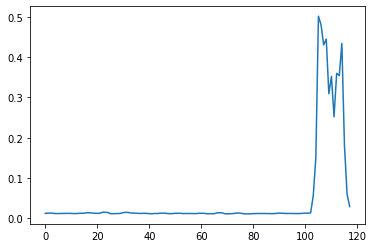

In [22]:
print(f"{adfuller(series[0:-2])[1]:.10f}") # p_value
plt.plot(series[0:-2])

0.9980800706


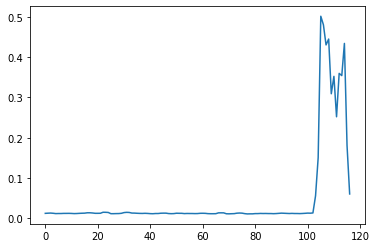

In [21]:
print(f"{adfuller(series[0:-3])[1]:.10f}") # p_value
plt.plot(series[0:-3])

In [20]:
# Try KPSS-test
import statsmodels.api as sm
print(f"{sm.tsa.kpss(series)[1]:.10f}") # p_value
# It works!

0.0822686401


In [35]:
print(f"{adfuller(series[20:])[1]:.10f}") # p_value
plt.plot(series[20:])

0.1279073458


0.0000588319


AttributeError: 'numpy.ndarray' object has no attribute 'print'

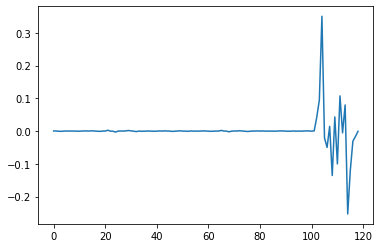

In [10]:
# first‐order differentiation
print(f"{adfuller(np.diff(series))[1]:.10f}") # p_value
plt.plot(np.diff(series))

In [7]:
# regression variants
print(f"constant only: {adfuller(series)[1]:.10f}") # p_value
print(f"constant and trend: {adfuller(series, regression='ct')[1]:.10f}") # p_value
print(f"constant, and linear and quadratic trend: {adfuller(series, regression='ctt')[1]:.10f}") # p_value
print(f"no constant, no trend: {adfuller(series, regression='nc')[1]:.10f}") # p_value

# autolag
print(f"AIC: {adfuller(series)[1]:.10f}") # p_value
print(f"BIC: {adfuller(series, autolag='BIC')[1]:.10f}") # p_value
print(f"t-stat: {adfuller(series, autolag='t-stat')[1]:.10f}") # p_value

constant only: 0.0000020054
constant and trend: 0.0000065816
constant, and linear and quadratic trend: 0.0000030062
no constant, no trend: 0.0000270454
AIC: 0.0000020054
BIC: 0.0000020054
t-stat: 0.0000020054


array([11206656., 11218944., 11243520., 11243520., 11259904., 11268096.,
       11300864., 11448320., 11448320., 11612160., 11517952., 11517952.,
       11616256., 11624448., 11644928., 11673600., 11673600., 11689984.,
       11698176., 11706368., 11718656., 11730944., 11743232., 11755520.,
       11821056., 11821056., 11837440., 11837440., 11878400., 11898880.,
       11898880., 11911168., 11911168., 11915264., 11931648., 11931648.,
       11935744., 12046336., 12046336., 12046336., 12054528., 12066816.,
       12066816., 12070912., 12201984., 12083200., 12083200., 12083200.,
       12087296., 12087296., 12111872., 12111872., 12115968., 12120064.,
       12124160., 12132352., 12132352., 12140544., 12144640., 12201984.,
       12201984., 12214272., 12214272., 12222464., 12230656., 12230656.,
       12238848., 12242944., 12247040., 12247040., 12251136., 12251136.,
       12251136., 12255232., 12255232., 12263424., 12263424., 12263424.,
       12263424., 12263424., 12267520., 12267520., 

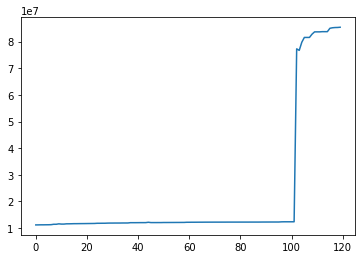

In [8]:
filepath = '/tmp/sockshop/metrics-b2qdj-retrievd_20210904/2021-08-18-argowf-chaos-b2qdj-user_pod-memory-hog_3.json'
data_df, _, metrics_meta = tsdr.read_metrics_json(filepath)
series = data_df['c-user_memory_working_set_bytes'].to_numpy()
plt.plot(series)
series

In [9]:
print(f"{adfuller(series)[1]:.10f}") # p_value

0.9488689977


0.9481553202


array([ 8093696.,  8093696.,  8093696.,  8093696.,  8093696.,  8093696.,
        8093696.,  8228864.,  8228864.,  8364032.,  8364032.,  8364032.,
        8364032.,  8364032.,  8499200.,  8499200.,  8499200.,  8499200.,
        8499200.,  8499200.,  8499200.,  8499200.,  8499200.,  8499200.,
        8634368.,  8634368.,  8634368.,  8634368.,  8634368.,  8634368.,
        8634368.,  8769536.,  8769536.,  8769536.,  8769536.,  8769536.,
        8769536.,  8904704.,  8904704.,  8904704.,  8904704.,  8904704.,
        8904704.,  8904704.,  8904704.,  8904704.,  8904704.,  8904704.,
        8904704.,  8904704.,  8904704.,  8904704.,  8904704.,  8904704.,
        8904704.,  8904704.,  8904704.,  8904704.,  8904704.,  8904704.,
        8904704.,  8904704.,  8904704.,  8904704.,  8904704.,  8904704.,
        8904704.,  8904704.,  8904704.,  8904704.,  8904704.,  8904704.,
        8904704.,  9039872.,  9039872.,  9039872.,  9039872.,  9039872.,
        9039872.,  9039872.,  9039872.,  9039872., 

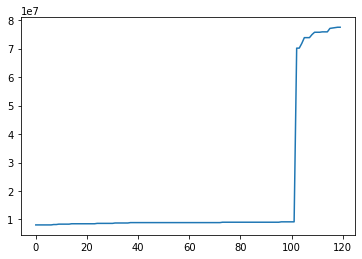

In [11]:
series = data_df['c-user_memory_rss'].to_numpy()
plt.plot(series)
print(f"{adfuller(series)[1]:.10f}") # p_value
series

0.0000000000


array([11223040., 11247616., 11259904., 11284480., 11325440., 11337728.,
       11337728., 11362304., 11378688., 11407360., 11419648., 11436032.,
       11444224., 11460608., 11644928., 11653120., 11681792., 11694080.,
       11698176., 11759616., 11759616., 11788288., 11800576., 11800576.,
       11821056., 11825152., 11833344., 11837440., 11849728., 11980800.,
       11857920., 11862016., 11866112., 11866112., 11886592., 11886592.,
       11890688., 11890688., 11894784., 11898880., 11902976., 11902976.,
       11915264., 11919360., 11919360., 11919360., 11927552., 11935744.,
       11943936., 11943936., 11956224., 11956224., 11960320., 11960320.,
       11964416., 11968512., 11972608., 11976704., 11976704., 11980800.,
       11980800., 11980800., 11993088., 11993088., 11993088., 11993088.,
       12001280., 12005376., 12009472., 12009472., 12009472., 12009472.,
       12013568., 12013568., 12025856., 12025856., 12025856., 12025856.,
       12025856., 12038144., 12169216., 12046336., 

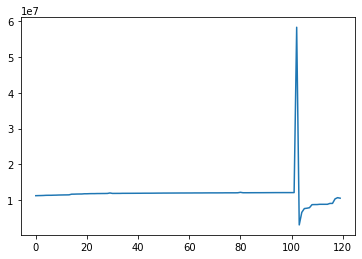

In [14]:
filepath = '/tmp/sockshop/metrics-b2qdj-retrievd_20210904/2021-08-18-argowf-chaos-b2qdj-user_pod-memory-hog_2.json'
data_df, _, metrics_meta = tsdr.read_metrics_json(filepath)
series = data_df['c-user_memory_working_set_bytes'].to_numpy()
plt.plot(series)
print(f"{adfuller(series)[1]:.10f}") # p_value
series

0.0008968180


array([0.0134, 0.0133, 0.0135, 0.0151, 0.0155, 0.0141, 0.0123, 0.0118,
       0.0117, 0.0119, 0.0124, 0.0132, 0.0138, 0.0146, 0.0141, 0.0139,
       0.013 , 0.0127, 0.0123, 0.0119, 0.012 , 0.0118, 0.0122, 0.012 ,
       0.0123, 0.0121, 0.0132, 0.0129, 0.0136, 0.0127, 0.0136, 0.0129,
       0.0135, 0.0124, 0.0146, 0.014 , 0.0141, 0.0121, 0.0125, 0.0125,
       0.0127, 0.013 , 0.0131, 0.0126, 0.0128, 0.013 , 0.0132, 0.0123,
       0.012 , 0.0121, 0.0125, 0.0128, 0.0127, 0.0127, 0.0128, 0.0126,
       0.0124, 0.0119, 0.0119, 0.012 , 0.0125, 0.0129, 0.013 , 0.0129,
       0.013 , 0.013 , 0.0146, 0.0151, 0.0149, 0.0135, 0.013 , 0.0129,
       0.0127, 0.0122, 0.0125, 0.0124, 0.013 , 0.0127, 0.0129, 0.0121,
       0.0125, 0.0124, 0.013 , 0.0135, 0.0134, 0.0129, 0.0133, 0.0132,
       0.0134, 0.0119, 0.0122, 0.0125, 0.0131, 0.0125, 0.0121, 0.0117,
       0.0118, 0.0137, 0.0133, 0.0145, 0.0132, 0.0138, 0.0154, 0.0343,
       0.0871, 0.2854, 0.4846, 0.4386, 0.5355, 0.4125, 0.4714, 0.4451,
      

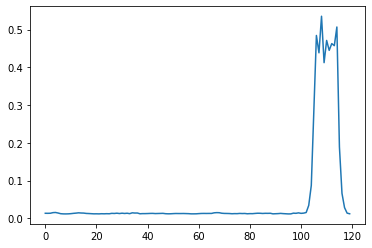

In [59]:
filepath = '/tmp/sockshop/metrics-b2qdj-retrievd_20210904/2021-08-18-argowf-chaos-b2qdj-user-db_pod-memory-hog_2.json'
data_df, _, metrics_meta = tsdr.read_metrics_json(filepath)
series = data_df['s-front-end_latency'].to_numpy()
plt.plot(series)
print(f"{adfuller(series)[1]:.10f}") # p_value
series

0.0036968828


array([0.0117, 0.0118, 0.0118, 0.0117, 0.0111, 0.0112, 0.0115, 0.0117,
       0.0121, 0.0122, 0.0121, 0.0119, 0.0125, 0.0126, 0.0136, 0.0136,
       0.0136, 0.0132, 0.0128, 0.013 , 0.0123, 0.0119, 0.0126, 0.013 ,
       0.0131, 0.0124, 0.0125, 0.013 , 0.0125, 0.0125, 0.0121, 0.0121,
       0.0117, 0.012 , 0.0142, 0.0146, 0.014 , 0.0119, 0.0126, 0.0131,
       0.0132, 0.0123, 0.0128, 0.0123, 0.0126, 0.012 , 0.0118, 0.011 ,
       0.0109, 0.0112, 0.0126, 0.0134, 0.0135, 0.0124, 0.0115, 0.012 ,
       0.0119, 0.0122, 0.0118, 0.0117, 0.012 , 0.0117, 0.0128, 0.0139,
       0.0141, 0.0135, 0.0129, 0.0129, 0.0131, 0.0123, 0.0129, 0.0123,
       0.0132, 0.0133, 0.0135, 0.0127, 0.0119, 0.0134, 0.0132, 0.0144,
       0.0127, 0.0128, 0.0117, 0.0117, 0.012 , 0.0123, 0.0127, 0.013 ,
       0.0133, 0.0128, 0.0121, 0.0128, 0.0133, 0.0149, 0.0142, 0.0148,
       0.0137, 0.0134, 0.0126, 0.0126, 0.0129, 0.0135, 0.0148, 0.0607,
       0.1408, 0.441 , 0.3737, 0.3245, 0.298 , 0.361 , 0.4085, 0.4065,
      

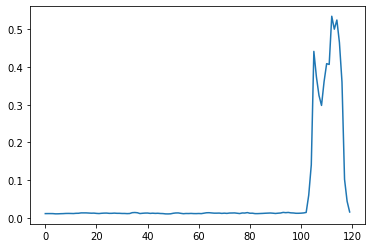

In [60]:
filepath = '/tmp/sockshop/metrics-b2qdj-retrievd_20210904/2021-08-18-argowf-chaos-b2qdj-user-db_pod-memory-hog_1.json'
data_df, _, metrics_meta = tsdr.read_metrics_json(filepath)
series = data_df['s-front-end_latency'].to_numpy()
plt.plot(series)
print(f"{adfuller(series)[1]:.10f}") # p_value
series

0.9294608092


array([0.013 , 0.013 , 0.0119, 0.0117, 0.0122, 0.0134, 0.0128, 0.0142,
       0.0148, 0.0157, 0.0136, 0.0125, 0.0134, 0.014 , 0.0151, 0.0135,
       0.0133, 0.0122, 0.012 , 0.0125, 0.0122, 0.0127, 0.0126, 0.0127,
       0.0123, 0.0118, 0.0119, 0.0123, 0.012 , 0.0118, 0.0114, 0.0113,
       0.0115, 0.012 , 0.0123, 0.0123, 0.0123, 0.0126, 0.0136, 0.0134,
       0.0137, 0.013 , 0.0126, 0.0118, 0.0123, 0.0125, 0.0126, 0.0128,
       0.0129, 0.0152, 0.0146, 0.0154, 0.0128, 0.0122, 0.0117, 0.0119,
       0.0122, 0.0117, 0.0121, 0.0115, 0.0114, 0.011 , 0.0111, 0.0112,
       0.0116, 0.012 , 0.0129, 0.0133, 0.0136, 0.013 , 0.0132, 0.0129,
       0.0127, 0.0116, 0.0117, 0.0118, 0.0124, 0.0119, 0.0129, 0.0132,
       0.0142, 0.0152, 0.015 , 0.0146, 0.0127, 0.013 , 0.0132, 0.0127,
       0.0129, 0.0126, 0.0131, 0.0121, 0.0121, 0.012 , 0.012 , 0.0122,
       0.012 , 0.0135, 0.0168, 0.0168, 0.0157, 0.0127, 0.0129, 0.0282,
       0.0577, 0.1799, 0.4682, 0.3581, 0.4579, 0.4216, 0.5452, 0.3923,
      

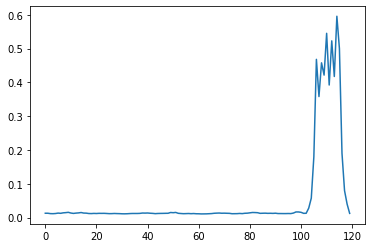

In [61]:
filepath = '/tmp/sockshop/metrics-b2qdj-retrievd_20210904/2021-08-18-argowf-chaos-b2qdj-user-db_pod-memory-hog_0.json'
data_df, _, metrics_meta = tsdr.read_metrics_json(filepath)
series = data_df['s-front-end_latency'].to_numpy()
plt.plot(series)
print(f"{adfuller(series)[1]:.10f}") # p_value
series

In [68]:
from arch.unitroot import ADF, DFGLS

filepath = '/tmp/sockshop/metrics-b2qdj-retrievd_20210904/2021-08-18-argowf-chaos-b2qdj-user_pod-memory-hog_3.json'
data_df, _, metrics_meta = tsdr.read_metrics_json(filepath)
print(ADF(data_df['s-front-end_latency']))
print(DFGLS(data_df['s-front-end_latency']))

   Augmented Dickey-Fuller Results   
Test Statistic                 -5.508
P-value                         0.000
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
      Dickey-Fuller GLS Results      
Test Statistic                 -5.375
P-value                         0.000
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -2.75 (1%), -2.13 (5%), -1.81 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [72]:
from arch.unitroot import ADF, DFGLS

filepath = '/tmp/sockshop/metrics-b2qdj-retrievd_20210904/2021-08-18-argowf-chaos-b2qdj-user_pod-memory-hog_2.json'
data_df, _, metrics_meta = tsdr.read_metrics_json(filepath)
print(ADF(data_df['c-user_memory_working_set_bytes']))
print(DFGLS(data_df['c-user_memory_working_set_bytes']))

   Augmented Dickey-Fuller Results   
Test Statistic                -11.739
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
      Dickey-Fuller GLS Results      
Test Statistic                -11.677
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -2.73 (1%), -2.11 (5%), -1.80 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [74]:
from arch.unitroot import ADF, DFGLS

filepath = '/tmp/sockshop/metrics-b2qdj-retrievd_20210904/2021-08-18-argowf-chaos-b2qdj-user-db_pod-memory-hog_2.json'
data_df, _, metrics_meta = tsdr.read_metrics_json(filepath)
print(ADF(data_df['s-front-end_latency']))
print(DFGLS(data_df['s-front-end_latency']))

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.120
P-value                         0.001
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
      Dickey-Fuller GLS Results      
Test Statistic                 -4.132
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -2.75 (1%), -2.13 (5%), -1.81 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import ADF, DFGLS

filepath = '/tmp/sockshop/metrics-b2qdj-retrievd_20210904/2021-08-18-argowf-chaos-b2qdj-user-db_pod-memory-hog_1.json'
data_df, _, metrics_meta = tsdr.read_metrics_json(filepath)
print(ADF(data_df['s-front-end_latency']))
print(DFGLS(data_df['s-front-end_latency']))

0.9862303900


array([ 9084928.,  9105408.,  9146368.,  9146368.,  9158656.,  9175040.,
        9187328.,  9236480.,  9252864.,  9252864.,  9256960.,  9256960.,
        9281536.,  9281536.,  9302016.,  9302016.,  9302016.,  9318400.,
        9338880.,  9342976.,  9351168.,  9363456.,  9367552.,  9371648.,
        9388032.,  9392128.,  9396224.,  9400320.,  9412608.,  9420800.,
        9428992.,  9437184.,  9441280.,  9441280.,  9441280.,  9445376.,
        9445376.,  9449472.,  9449472.,  9449472.,  9449472.,  9465856.,
        9469952.,  9469952.,  9486336.,  9494528.,  9502720.,  9510912.,
        9510912.,  9523200.,  9523200.,  9523200.,  9662464.,  9539584.,
        9551872.,  9555968.,  9555968.,  9555968.,  9555968.,  9568256.,
        9580544.,  9580544.,  9723904.,  9723904.,  9592832.,  9592832.,
        9596928.,  9609216.,  9613312.,  9613312.,  9613312.,  9613312.,
        9613312.,  9617408.,  9617408.,  9617408.,  9617408.,  9629696.,
        9629696.,  9629696.,  9633792.,  9633792., 

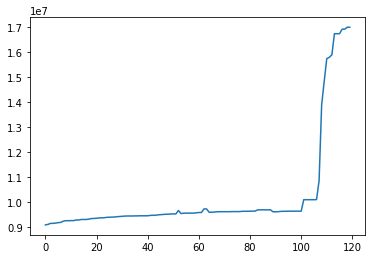

In [6]:
# try AR(1) DF test

filepath = '/tmp/sockshop/metrics-b2qdj-retrievd_20210904/2021-08-18-argowf-chaos-b2qdj-catalogue_pod-memory-hog_2.json'
data_df, _, metrics_meta = tsdr.read_metrics_json(filepath)
series = data_df['c-catalogue_memory_working_set_bytes'].to_numpy()
plt.plot(series)
print(f"{adfuller(series, maxlag=1, autolag=None)[1]:.10f}") # p_value
series